## Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, проведем разведывательный анализ данных и составим отчёт по его результатам. 

## 1. Первичный анализ данных в столбцах

In [1]:
# Импортируем необходимые для чтения и первичного анализа библиотеки: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# открываем файл и присваиваем нашему датасету название
math_progress = pd.read_csv('stud_math.csv')

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(math_progress.head())
math_progress.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В нашем датасете 13 числовых столбцов  а у 17 столбцов тип "общий" (object). 

При этом у некторых столбцов названия начинаются с большой буквы, что в дальнейшем будет неудобно пр обработке датасета. 

Давайте приведем наименования столбцов к удобному для работы виду.

In [3]:
# Для изменения регистра букв используем функцию python -  lower()
math_progress.columns = [x.lower() for x in math_progress.columns]
math_progress.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Так же, в 27-ми столбцах присутствуют пропущенные значения. При этом, отсутствие значений в 17 столбцах может привести к некорректным вычислениям в дальнейшем.

Заполним пропуски в столбцах с типом object на значение "None" которое будет восприниматься python корректно. None обычно используют для обозначения того, что конкретное значение отсуствует.  

Чтобы избавиться от рутинной работы с каждым столбцом, для этого напишем функцию и передадим в нее рассматриваемый датафрэйм:  

In [4]:
""" Функция replace_none_value получает на вход весь датафрэйм, одбирает столбцы содержащие
значения с типом object ('O'), меняет пропущенные значения в столбцах на "None" 
и возвращает измененный датафрэйм """


def replace_none_value(df):
    for col in math_progress.columns:
        if math_progress[col].dtype == 'O':
            math_progress[col] = math_progress[col].astype(str).apply(lambda x: None if pd.isnull(x)
                                        else None if 'nan' in x else None if x.strip() == '' else x)
        else:
            continue
    return df

In [5]:
# Передаем датафрэйм в функцию
replace_none_value(math_progress)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,None,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,None,no,no,no,no,-3.0,None,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,None,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [190]:
# Проверим корректность работы функции
math_progress.info()
for col in math_progress.columns:
    print(sorted(math_progress[col].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   pstatus              395 non-null    object 
 6   medu                 392 non-null    float64
 7   fedu                 371 non-null    float64
 8   mjob                 395 non-null    object 
 9   fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            395 non-null    obj

Функция отработала правильно. Теперь рассмотрим все 30 (!) столбцов по отдельности.

### school - аббревиатура школы, в которой учится ученик

Здесь и далее для оценки уникальных значений мы будем использовать функцию value_counts.

In [6]:
display(pd.DataFrame(math_progress.school.value_counts()))

,school
GP,349
MS,46


Значения в этом столбце представлены, без пропусков, в виде аббревиатур 2-х школ, в которых учатся ученики. Количество уникальных значений соответствует количеству строк. Оставляем этот столбец без изменений.

### sex - пол ученика ('F' - женский, 'M' - мужской)

In [7]:
display(pd.DataFrame(math_progress.sex.value_counts()))

,sex
F,208
M,187


В этом нечисловом столбце указан пол ученика ('F' - женский, 'M' - мужской). Этот столбец без пропусков и вероятно может понадобиться нам для дальнейшего анализа. Поэтому оставляем данный столбец без изменений.

### age - возраст ученика (от 15 до 22)

Данный столбец числовой и содержит возраст ученика (от 15 до 22)

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


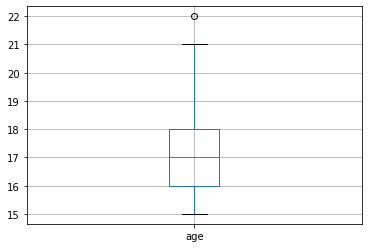

In [8]:
display(pd.DataFrame(math_progress.age.value_counts(dropna=False)))
math_progress.boxplot(column=['age'])
print(math_progress.age.describe())

Похоже в этом столбце присутствуют выброс (age = 22) так как основное распределение данных лежит в интервале от 15 до 21. Воспользуемся формулой интерквартильного расстояния (межквартильного размаха). 

Выбросом считаются такие значения, которые лежат вне рамок:

percentile(25) -1.5*IQR : percentile(75)+1.5*IQR,
где IQR = percentile(75) - percentile(25).

Давайте это проверим

In [9]:
median = math_progress.age.median()
IQR = math_progress.age.quantile(0.75) - math_progress.age.quantile(0.25)
perc25 = math_progress.age.quantile(0.25)
perc75 = math_progress.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


Вышеуказанное значение оказалось выбросом. Тем не менее, оставим столбец без изменений так как возраст 22 входит в интервал значений столбца согласно заданию. 

### address - тип адреса ученика ('U' - городской, 'R' - за городом)

In [10]:
display(pd.DataFrame(math_progress.address.value_counts()))
math_progress.address.value_counts(normalize=True)

,address
U,295
R,83


U    0.780423
R    0.219577
Name: address, dtype: float64

В столбце присутствуют 17 значений "None" или 4% от всех значений столбца. Так как мы не знаем как измениться модель при удалении этих строк, на данном этапе оставим столбец без изменений. 

### famsize - размер семьи('LE3' <= 3, 'GT3' >3)

In [11]:
display(pd.DataFrame(math_progress.famsize.value_counts()))
math_progress.famsize.value_counts(normalize=True)

,famsize
GT3,261
LE3,107


GT3    0.709239
LE3    0.290761
Name: famsize, dtype: float64

В столбце присутствуют 27 отсутствующих значений или 7% от всех значений столбца. На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому пока оставим столбец без изменений. 

### pstatus -  статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [12]:
display(pd.DataFrame(math_progress.pstatus.value_counts()))
math_progress.pstatus.value_counts(normalize=True)

,pstatus
T,314
A,36


T    0.897143
A    0.102857
Name: pstatus, dtype: float64

В столбце присутствуют 45 отсутствующих значений или 9% от всех значений столбца, что довольно странно. На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому оставим столбец без изменений. 

### medu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3


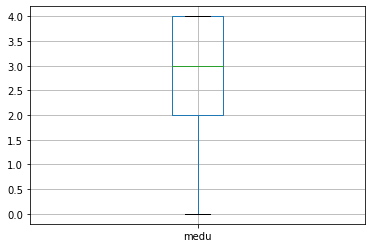

In [13]:
display(pd.DataFrame(math_progress.medu.value_counts(dropna=False)))
math_progress.boxplot(column=['medu'])

Это числовой столбец с номинативными данными, без выбросов. Количество отсутствующих данных не превышает 3. Оставляем столбец без изменений. 

### fedu - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


2.0     0.268354
3.0     0.243038
4.0     0.222785
1.0     0.197468
NaN     0.060759
0.0     0.005063
40.0    0.002532
Name: fedu, dtype: float64

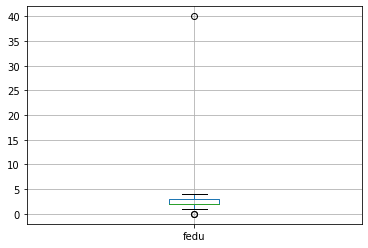

In [14]:
display(pd.DataFrame(math_progress.fedu.value_counts(dropna=False)))
display(math_progress.fedu.value_counts(dropna=False, normalize=True))
math_progress.boxplot(column=['fedu'])

В данном числовом столбце с номинативными данными отсутствует "24" значения и не превышает 6% всех значений столбца. Как показывает график, присутствуют выбросы.

Возможно значения выброса равное "40" является ошибкой и на самом деле равно "4". Чтобы исправить ошибку применим к значениям столбца lambda функцию: 

In [15]:
math_progress.fedu = math_progress.fedu.apply(lambda x: 4.0 if x == 40 else x)

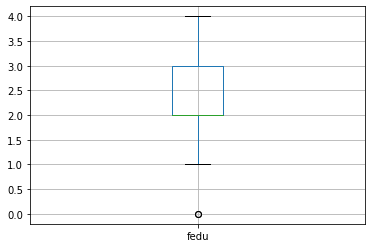

In [16]:
# и посмотрим, что получилось:
math_progress.boxplot(column=['fedu'])

Остался один выброс со значением "0". Однако на данном этапе мы не будем его исключать так как мы знаем, что номинативное значение "0" означает, что у отца нет образования и это может исказить общий результат вцелом.

### mjob - работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [17]:
display(pd.DataFrame(math_progress.mjob.value_counts()))
display(math_progress.mjob.value_counts(normalize=True))

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


other       0.353723
services    0.260638
at_home     0.154255
teacher     0.146277
health      0.085106
Name: mjob, dtype: float64

Это нечисловой столбец в котором количество отсутствующих значений 19 и не превышает 5% от общего числа. 

Так как в этом столбце есть значение "other - другое" с точки зрения здравого смысла, можно заменить значения "None" на "other". Для этого используем lambda функцию:

In [18]:
math_progress.mjob = math_progress.mjob.apply(lambda x: 'other' if x == 'None' else x)

In [19]:
# Проверим, что получилось:
display(pd.DataFrame(math_progress.mjob.value_counts()))
display(math_progress.mjob.value_counts(normalize=True))

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


other       0.353723
services    0.260638
at_home     0.154255
teacher     0.146277
health      0.085106
Name: mjob, dtype: float64

### fjob - работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [20]:
display(pd.DataFrame(math_progress.fjob.value_counts()))
display(math_progress.fjob.value_counts(normalize=True))

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


other       0.548747
services    0.284123
teacher     0.080780
at_home     0.044568
health      0.041783
Name: fjob, dtype: float64

Это нечисловой столбец в котором количество отсутствующих значений 36 и не превышает 5% от общего числа. 

Так как в этом столбце есть значение "other - другое" с точки зрения здравого смысла, можно заменить значения "None" на "other". Для этого используем lambda функцию:

In [21]:
math_progress.fjob = math_progress.fjob.apply(lambda x: 'other' if x == 'None' else x)

In [22]:
# Проверяем, что получилось в итоге:
display(pd.DataFrame(math_progress.fjob.value_counts()))
display(math_progress.fjob.value_counts(normalize=True))

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


other       0.548747
services    0.284123
teacher     0.080780
at_home     0.044568
health      0.041783
Name: fjob, dtype: float64

### reason - причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [23]:
display(pd.DataFrame(math_progress.reason.value_counts()))
display(math_progress.reason.value_counts(normalize=True))

,reason
course,137
home,104
reputation,103
other,34


course        0.362434
home          0.275132
reputation    0.272487
other         0.089947
Name: reason, dtype: float64

Это нечисловой столбец в котором количество отсутствующих значений 17 и не превышает 4% от общего числа. 

Так как в этом столбце есть значение "other - другое" с точки зрения здравого смысла, можно заменить значения "None" на "other". Для этого используем lambda функцию:

In [24]:
math_progress.reason = math_progress.reason.apply(lambda x: 'other' if x == 'None' else x)

In [25]:
# проверим корректность работы кода:
display(pd.DataFrame(math_progress.reason.value_counts()))
display(math_progress.reason.value_counts(normalize=True))

,reason
course,137
home,104
reputation,103
other,34


course        0.362434
home          0.275132
reputation    0.272487
other         0.089947
Name: reason, dtype: float64

### guardian - опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [26]:
display(pd.DataFrame(math_progress.guardian.value_counts()))
display(math_progress.guardian.value_counts(normalize=True))

,guardian
mother,250
father,86
other,28


mother    0.686813
father    0.236264
other     0.076923
Name: guardian, dtype: float64

Это нечисловой столбец в котором количество отсутствующих значений 31 или 7% от общего числа значений. 

Производим теже манипуляции как в столбцах выше:

In [27]:
math_progress.guardian = math_progress.guardian.apply(lambda x: 'other' if x == 'None' else x)

In [28]:
# Проверка:
display(pd.DataFrame(math_progress.guardian.value_counts()))
display(math_progress.guardian.value_counts(normalize=True))

,guardian
mother,250
father,86
other,28


mother    0.686813
father    0.236264
other     0.076923
Name: guardian, dtype: float64

### traveltime - время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

,traveltime
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7


1.0    0.612658
2.0    0.243038
NaN    0.070886
3.0    0.055696
4.0    0.017722
Name: traveltime, dtype: float64

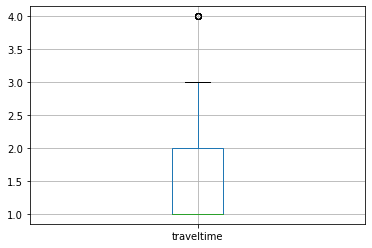

In [29]:
display(pd.DataFrame(math_progress.traveltime.value_counts(dropna=False)))
display(math_progress.traveltime.value_counts(dropna=False, normalize=True))
math_progress.boxplot(column=['traveltime'])

Это числовой столбец с номинативными данными и выбросами в значении "4". Количество отсутствующих данных равно 28 и не превышает 7% от общего числа значений. На данном этапе мы не будем его исключать так как мы знаем, что номинативное значение "4" означает, что время в пути превышает 60 минут и это может исказить общий результат в целом.  Оставляем столбец без изменений. 

### studytime -  время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


2.0    0.500000
1.0    0.265464
3.0    0.164948
4.0    0.069588
Name: studytime, dtype: float64

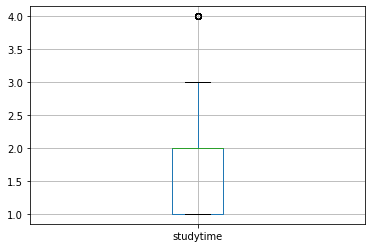

In [30]:
display(pd.DataFrame(math_progress.studytime.value_counts()))
display(math_progress.studytime.value_counts(normalize=True))
math_progress.boxplot(column=['studytime'])

Это числовой столбец с номинативными данными и выбросами в значении "4". Количество отсутствующих данных равно 28 и не превышает 7% от общего числа значений. На данном этапе мы не будем его исключать так как мы знаем, что номинативное значение "4" означает, что время на учебу помимо школы в неделю превышает 10 часов и это может исказить общий результат в целом.  Оставляем столбец без изменений.

### failures - количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

,failures
0.0,293
1.0,49
2.0,16
3.0,15


0.0    0.785523
1.0    0.131367
2.0    0.042895
3.0    0.040214
Name: failures, dtype: float64

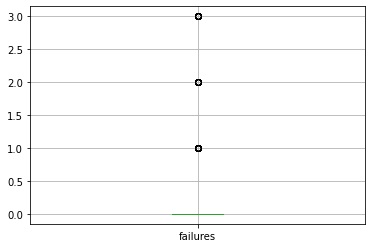

In [31]:
display(pd.DataFrame(math_progress.failures.value_counts()))
display(math_progress.failures.value_counts(normalize=True))
math_progress.boxplot(column=['failures'])

Это числовой столбец с номинативными данными без пропусков и большим количеством выбросов. 

На данном этапе мы не будем исключать выбросы так как с точки зрения здравого смысла, отсутствие этих данных   может исказить общий результат в целом.  Оставляем столбец без изменений.

### schoolsup - дополнительная образовательная поддержка (yes или no)

In [32]:
display(pd.DataFrame(math_progress.schoolsup.value_counts()))
display(math_progress.schoolsup.value_counts(normalize=True))

,schoolsup
no,335
yes,51


no     0.867876
yes    0.132124
Name: schoolsup, dtype: float64

В столбце 9 отсутствующих значений или 2% от всех значений столбца. 

На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому пока оставим столбец без изменений. 

### famsup - семейная образовательная поддержка (yes или no)

In [33]:
display(pd.DataFrame(math_progress.famsup.value_counts()))
display(math_progress.famsup.value_counts(normalize=True))

,famsup
yes,219
no,137


yes    0.615169
no     0.384831
Name: famsup, dtype: float64

В столбце 39 отсутствующих значений или 10% от общего числа.

В дальнейшем возможно придется исключить данный столбец из модели из-за большого количества пропусков.

### paid - дополнительные платные занятия по математике (yes или no)

In [34]:
display(pd.DataFrame(math_progress.paid.value_counts()))
display(math_progress.paid.value_counts(normalize=True))

,paid
no,200
yes,155


no     0.56338
yes    0.43662
Name: paid, dtype: float64

В столбце 39 отсутствующих значений или 10% от общего числа.

В дальнейшем возможно придется исключить данный столбец из модели из-за большого количества пропусков.

### activities - дополнительные внеучебные занятия (yes или no)

In [35]:
display(pd.DataFrame(math_progress.activities.value_counts()))
display(math_progress.activities.value_counts(normalize=True))

,activities
yes,195
no,186


yes    0.511811
no     0.488189
Name: activities, dtype: float64

В столбце 14 отсутствующих значений или 3,5% от общего числа значений.

На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому пока оставим столбец без изменений.

### nursery - посещал детский сад (yes или no)

In [36]:
display(pd.DataFrame(math_progress.nursery.value_counts()))
display(math_progress.nursery.value_counts(normalize=True))

,nursery
yes,300
no,79


yes    0.791557
no     0.208443
Name: nursery, dtype: float64

В столбце 16 отсутствующих значений или 4% от общего числа значений.

На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому пока оставим столбец без изменений.

### studytime, granular

In [37]:
display(pd.DataFrame(math_progress['studytime, granular'].value_counts()))
display(math_progress['studytime, granular'].value_counts(normalize=True))

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


-6.0     0.500000
-3.0     0.265464
-9.0     0.164948
-12.0    0.069588
Name: studytime, granular, dtype: float64

Числовой столбец с отрицательными значениями отсутствует в исходных данных текущего задания и в датафрэйме уже есть столбец с таким названием.

Исключим данный столбец из датафрэйма чтобы избежать его влияния на итоговый результат.

In [38]:
math_progress.drop(['studytime, granular'], inplace = True, axis = 1)

In [39]:
# Проверка:
math_progress.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


### higher - хочет получить высшее образование (yes или no)

In [40]:
display(pd.DataFrame(math_progress.higher.value_counts()))
display(math_progress.higher.value_counts(normalize=True))

,higher
yes,356
no,19


yes    0.949333
no     0.050667
Name: higher, dtype: float64

В столбце 20 отсутствующих значений или 4.5% от общего числа значений.

На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому пока оставим столбец без изменений.

### internet -  наличие интернета дома (yes или no)

In [41]:
display(pd.DataFrame(math_progress.internet.value_counts()))
display(math_progress.internet.value_counts(normalize=True))

,internet
yes,305
no,56


yes    0.844875
no     0.155125
Name: internet, dtype: float64

В столбце 34 отсутствующих значения или 9% от общего числа значений.

На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому пока оставим столбец без изменений.

### romantic -  в романтических отношениях (yes или no)

In [42]:
display(pd.DataFrame(math_progress.romantic.value_counts()))
display(math_progress.romantic.value_counts(normalize=True))

,romantic
no,240
yes,124


no     0.659341
yes    0.340659
Name: romantic, dtype: float64

В столбце 31 отсутствуюе значение или 8% от общего числа значений.

На данном этапе мы не знаем как измениться модель при замене значений или удалении этих строк, поэтому пока оставим столбец без изменений.

### famrel - семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


 4.0    0.494565
 5.0    0.269022
 3.0    0.168478
 2.0    0.046196
 1.0    0.019022
-1.0    0.002717
Name: famrel, dtype: float64

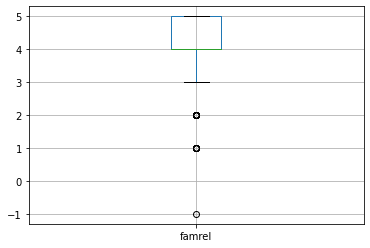

In [43]:
display(pd.DataFrame(math_progress.famrel.value_counts()))
display(math_progress.famrel.value_counts(normalize=True))
math_progress.boxplot(column=['famrel'])

Столбец с номинативными данными без пропущенных значений, есть выбросы и видимо одна ошибка (-1). 

In [44]:
# Проверим наличие выбросов:
median = math_progress.famrel.median()
IQR = math_progress.famrel.quantile(0.75) - math_progress.famrel.quantile(0.25)
perc25 = math_progress.famrel.quantile(0.25)
perc75 = math_progress.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".
      format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


На данном этапе выбросы исключать не будем а вот ошибку нужно исправить с помощью lambda функции:

In [45]:
math_progress.famrel = math_progress.famrel.apply(lambda x: 1 if x == -1 else x)

In [46]:
# Проверка:
display(pd.DataFrame(math_progress.famrel.value_counts()))
display(math_progress.famrel.value_counts(normalize=True))

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


4.0    0.494565
5.0    0.269022
3.0    0.168478
2.0    0.046196
1.0    0.021739
Name: famrel, dtype: float64

### freetime - свободное время после школы (от 1 - очень мало до 5 - очень мого)

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


3.0    0.398438
4.0    0.291667
2.0    0.164062
5.0    0.098958
1.0    0.046875
Name: freetime, dtype: float64

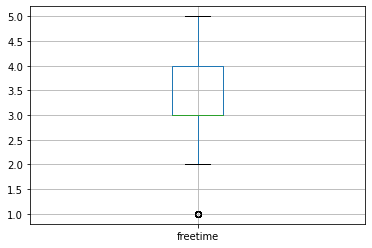

In [47]:
display(pd.DataFrame(math_progress.freetime.value_counts()))
display(math_progress.freetime.value_counts(normalize=True))
math_progress.boxplot(column=['freetime'])

Столбец с номинативными данными без пропущенных значений, есть выбросы в значении "1". 

На данном этапе не будем исключать выбросы так как знаем, что значение "1" означает очень мало свободного времени. Оставляем столбец без изменений.

### goout - проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


3.0    0.328165
2.0    0.260982
4.0    0.217054
5.0    0.134367
1.0    0.059432
Name: goout, dtype: float64

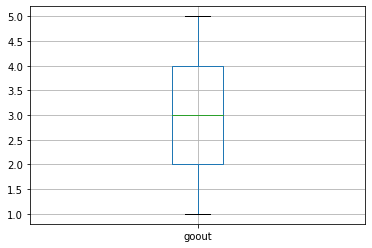

In [48]:
display(pd.DataFrame(math_progress.goout.value_counts()))
display(math_progress.goout.value_counts(normalize=True))
math_progress.boxplot(column=['goout'])

Столбец с номинативными данными без пропущенных значений и без выбросов. 

Оставляем столбец без изменений.

### health - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


5.0    0.363158
3.0    0.234211
4.0    0.165789
1.0    0.123684
2.0    0.113158
Name: health, dtype: float64

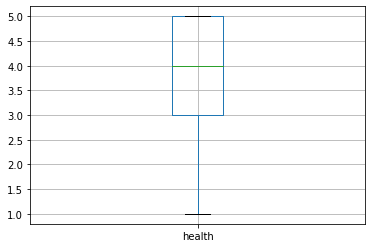

In [49]:
display(pd.DataFrame(math_progress.health.value_counts()))
display(math_progress.health.value_counts(normalize=True))
math_progress.boxplot(column=['health'])

Столбец с номинативными данными без пропущенных значений и без выбросов. 

Оставляем столбец без изменений.

### absences - количество пропущенных занятий

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


0.0      0.289817
2.0      0.156658
4.0      0.138381
6.0      0.080940
8.0      0.054830
10.0     0.044386
12.0     0.031332
14.0     0.031332
3.0      0.020888
16.0     0.018277
7.0      0.015666
5.0      0.013055
18.0     0.013055
20.0     0.010444
22.0     0.007833
9.0      0.007833
1.0      0.007833
15.0     0.005222
13.0     0.005222
11.0     0.005222
25.0     0.002611
54.0     0.002611
385.0    0.002611
26.0     0.002611
56.0     0.002611
24.0     0.002611
212.0    0.002611
21.0     0.002611
75.0     0.002611
30.0     0.002611
19.0     0.002611
38.0     0.002611
40.0     0.002611
23.0     0.002611
17.0     0.002611
28.0     0.002611
Name: absences, dtype: float64

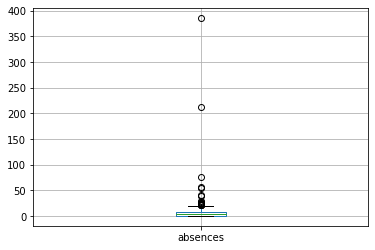

In [50]:
display(pd.DataFrame(math_progress.absences.value_counts()))
display(math_progress.absences.value_counts(normalize=True))
math_progress.boxplot(column=['absences'])

Числовой столбец без пропущенных значений. Основное распределение значений лежит в интервале от 0 до 20 с потенциальными выбросами свыше 20: 

In [51]:
median = math_progress.absences.median()
IQR = math_progress.absences.quantile(0.75) - math_progress.absences.quantile(0.25)
perc25 = math_progress.absences.quantile(0.25)
perc75 = math_progress.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,\
                                                                       l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


С точки зрения здравого смысла значения 212 и 385 являются ошибочными. Исключим строки с данными значениями из дальнейшего рассмотрения: 

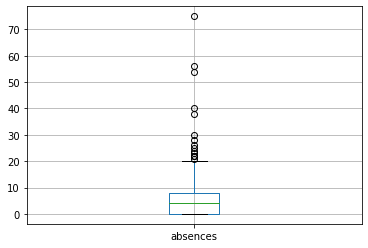

In [52]:
math_progress = math_progress.loc[math_progress.absences <= 100]
math_progress.boxplot(column=['absences'])

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


0.0     0.291339
2.0     0.157480
4.0     0.139108
6.0     0.081365
8.0     0.055118
10.0    0.044619
14.0    0.031496
12.0    0.031496
3.0     0.020997
16.0    0.018373
7.0     0.015748
5.0     0.013123
18.0    0.013123
20.0    0.010499
1.0     0.007874
22.0    0.007874
9.0     0.007874
15.0    0.005249
13.0    0.005249
11.0    0.005249
54.0    0.002625
25.0    0.002625
17.0    0.002625
26.0    0.002625
56.0    0.002625
23.0    0.002625
28.0    0.002625
21.0    0.002625
75.0    0.002625
30.0    0.002625
19.0    0.002625
38.0    0.002625
40.0    0.002625
24.0    0.002625
Name: absences, dtype: float64

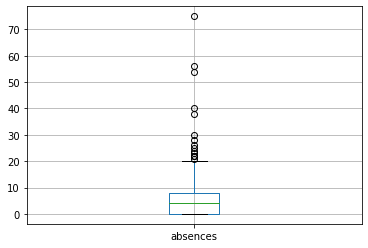

In [53]:
# Проверим, что получилось:
display(pd.DataFrame(math_progress.absences.value_counts()))
display(math_progress.absences.value_counts(normalize=True))
math_progress.boxplot(column=['absences'])

### score - баллы по госэкзамену по математике

,score
50.0,53
55.0,46
0.0,36
75.0,31
65.0,31
40.0,29
60.0,29
70.0,27
45.0,26
80.0,16


50.0     0.140957
55.0     0.122340
0.0      0.095745
75.0     0.082447
65.0     0.082447
40.0     0.077128
60.0     0.077128
70.0     0.071809
45.0     0.069149
80.0     0.042553
30.0     0.039894
90.0     0.029255
35.0     0.023936
25.0     0.018617
95.0     0.013298
85.0     0.007979
100.0    0.002660
20.0     0.002660
Name: score, dtype: float64

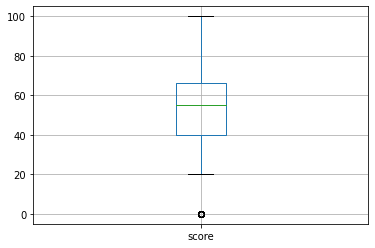

In [54]:
display(pd.DataFrame(math_progress.score.value_counts()))
display(math_progress.score.value_counts(normalize=True))
math_progress.boxplot(column=['score'])

Основной числовой столбец на котором будет строиться модель, без пропусков и с потенциальным выбросами в значении "0". 

На данном этапе мы не можем утвержать, что выбросы являются ошибкой. Так как значение "0" содержится в 36 строках датасета это может означать, что некоторые ученики либо не прошли экзамен полностью либо вообще на него не пришли. 

Оставим пока данный столбец без изменений.

## 2. Корреляционный анализ

Выясним, какие столбцы коррелируют с оценкой госэкзамена по математике (столбец - "score"). Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

Используем для наглядности матрицу корреляций:

In [55]:
correlation = math_progress.filter(items = ['age', 'absences', 'score']).corr()
correlation

,age,absences,score
age,1.000000,0.166773,-0.149349
absences,0.166773,1.000000,0.031698
score,-0.149349,0.031698,1.000000


Для быстрого построения графиков зависимости переменных можно воспользоваться функцией heatmap из модуля seaborn:

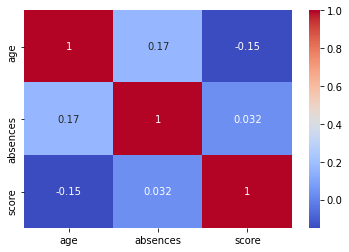

In [56]:
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

Все 3 переменных слабоскорелированы. Наиболее тесная связь прослеживается между переменной absences и score. 

## 3. Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения оценок за экзамен в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: 'school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health'.

In [57]:
'''Функция get_boxplot принимает на вход наименование столбца и возвращает график зависимости значений
столбца от значений столбца score'''


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score', data=math_progress, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

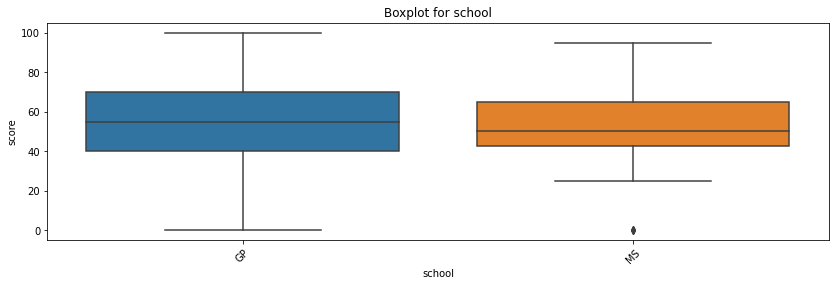

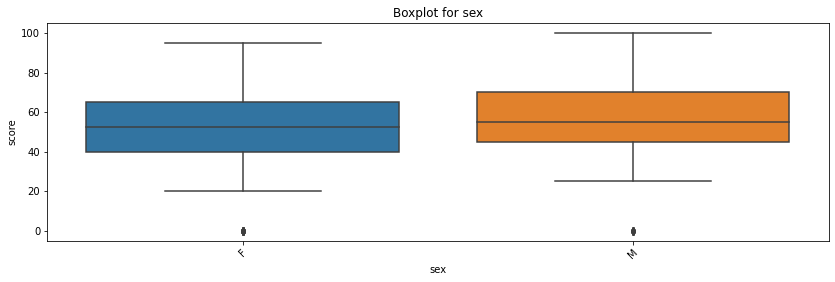

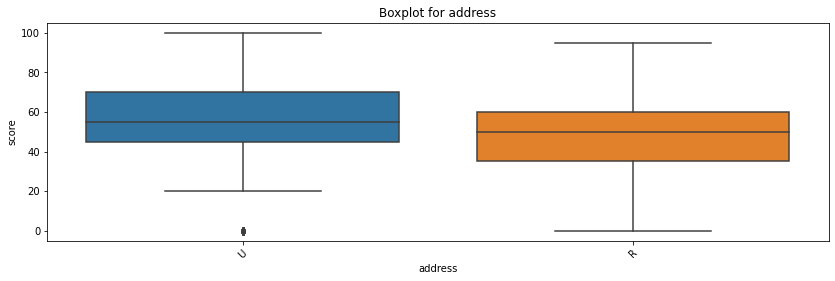

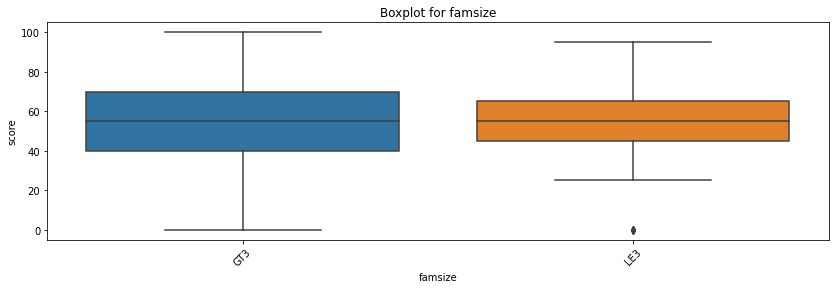

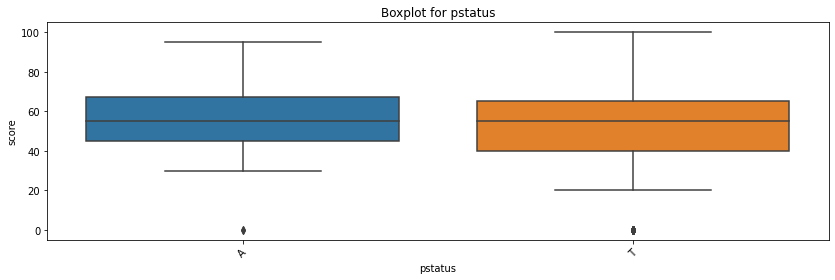

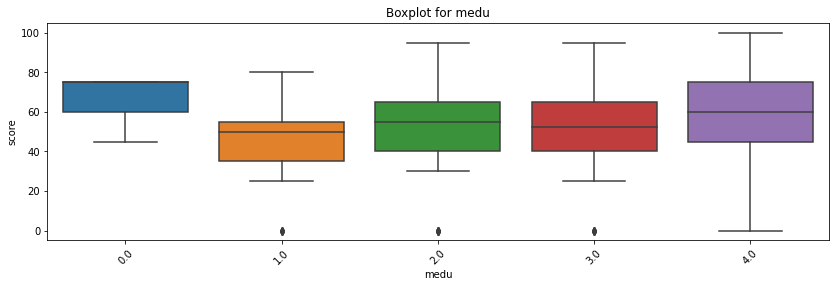

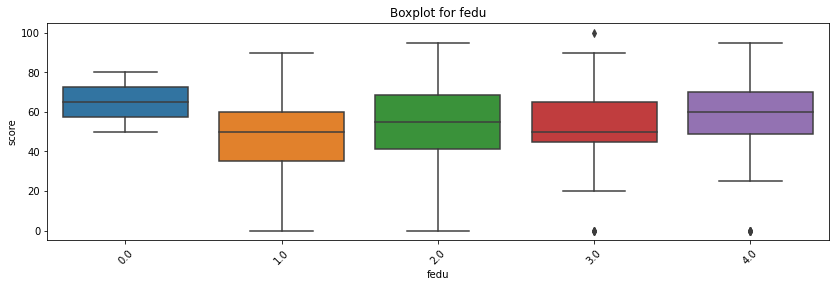

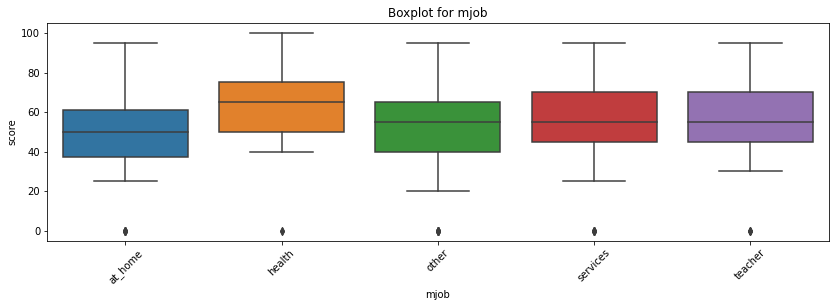

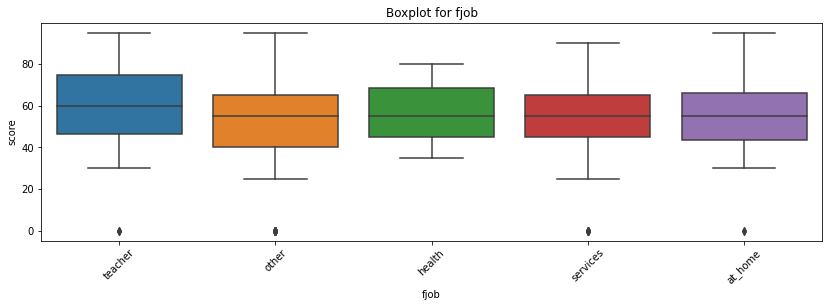

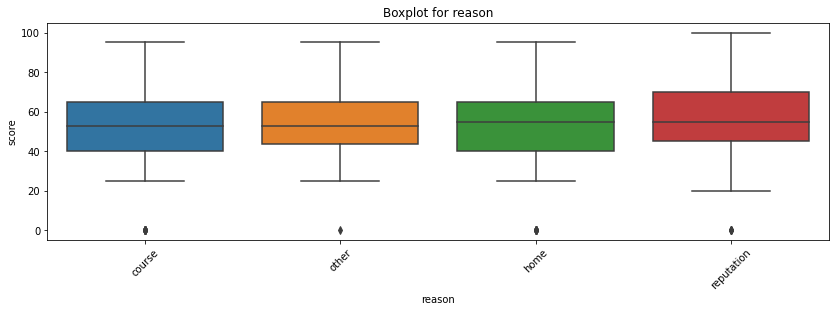

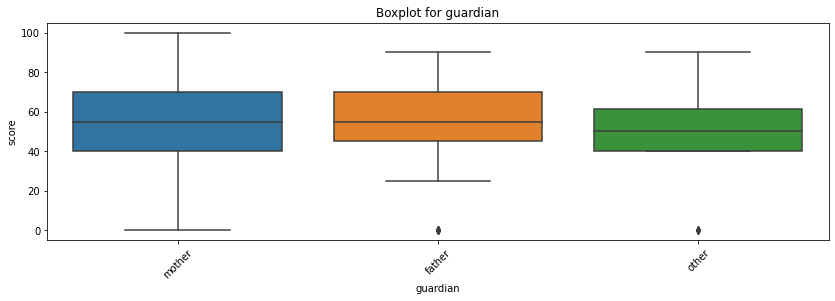

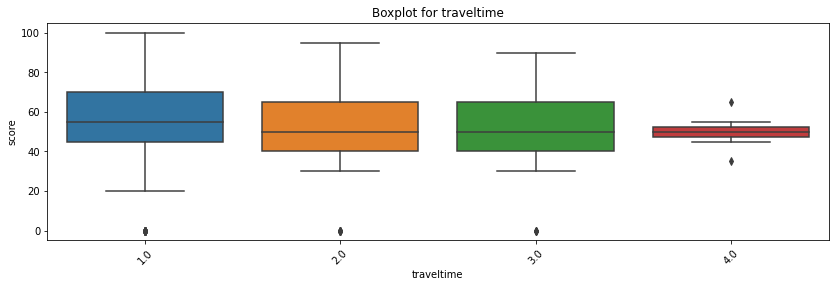

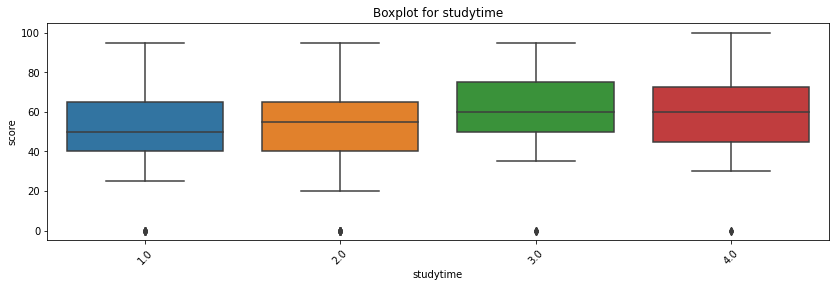

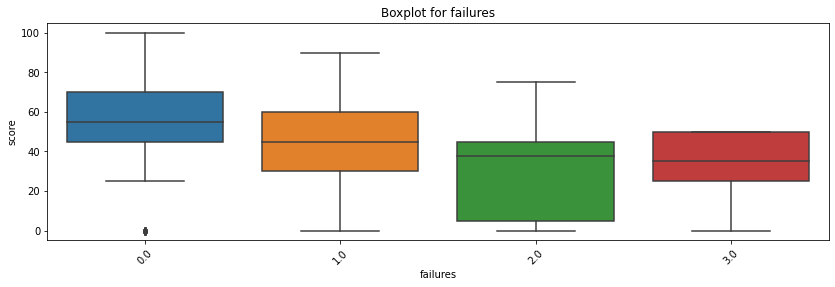

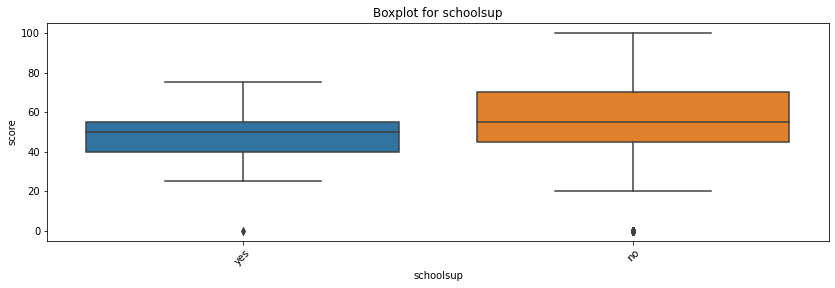

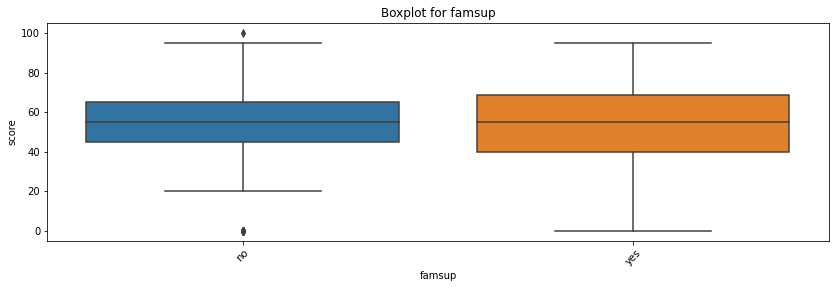

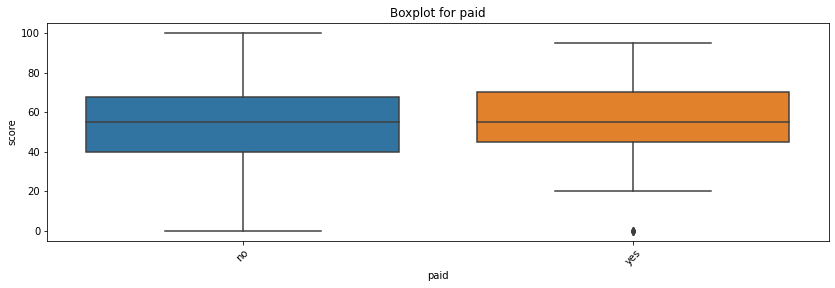

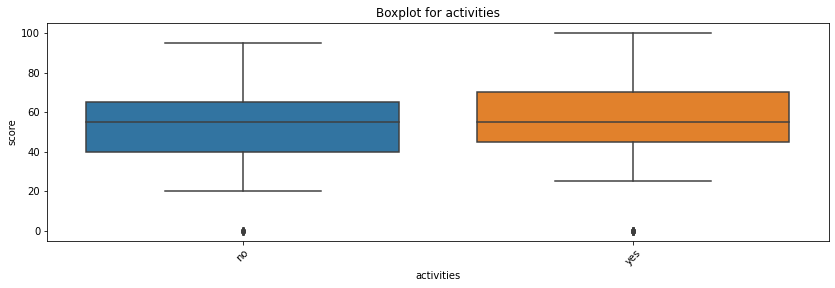

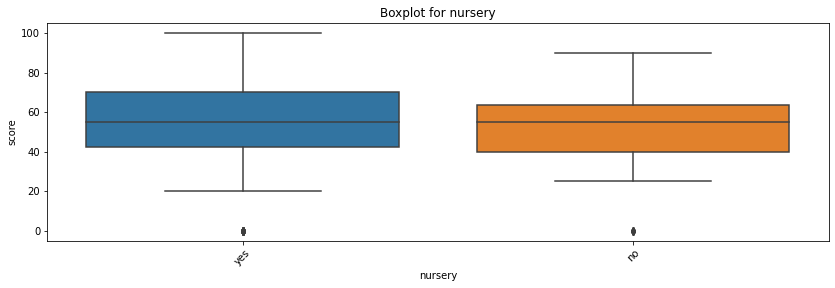

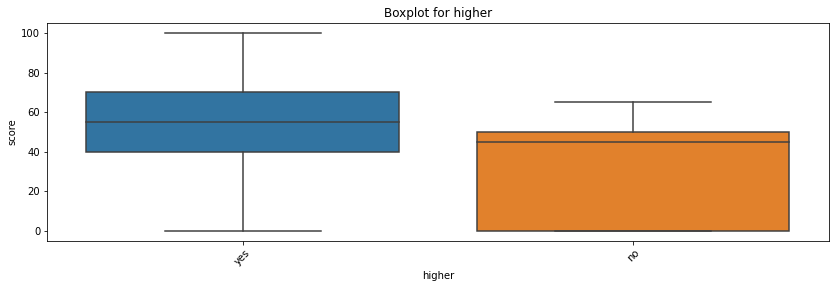

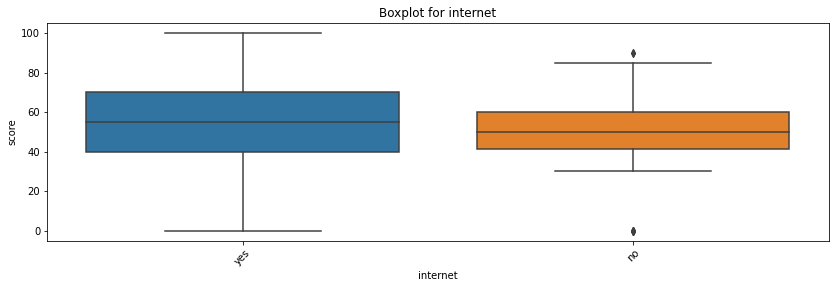

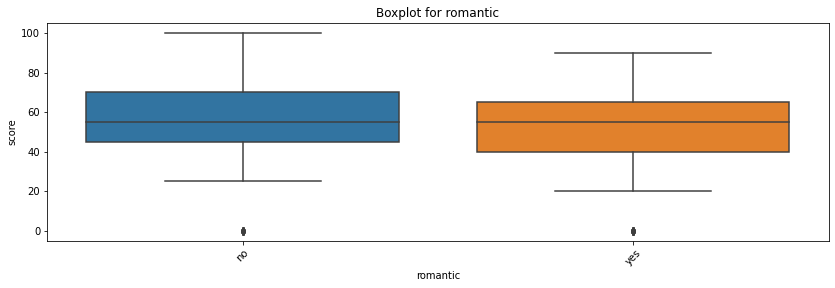

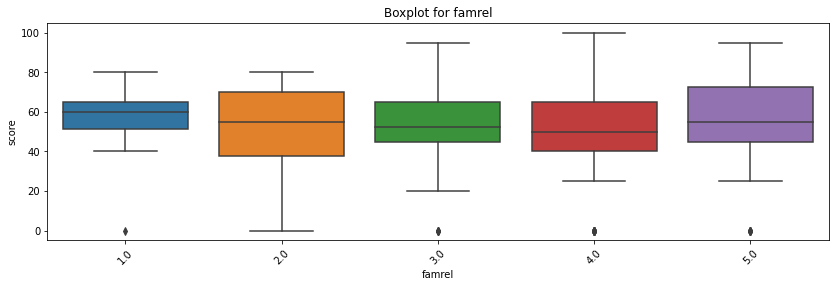

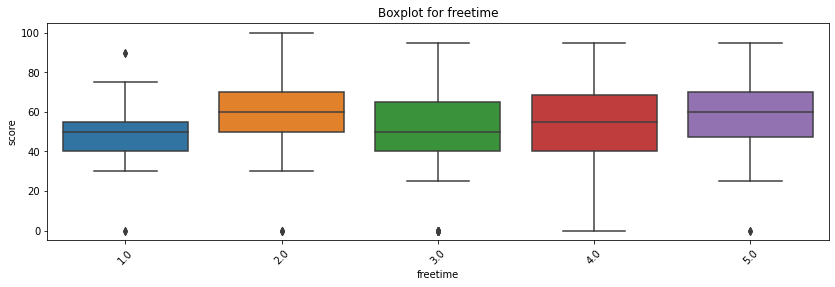

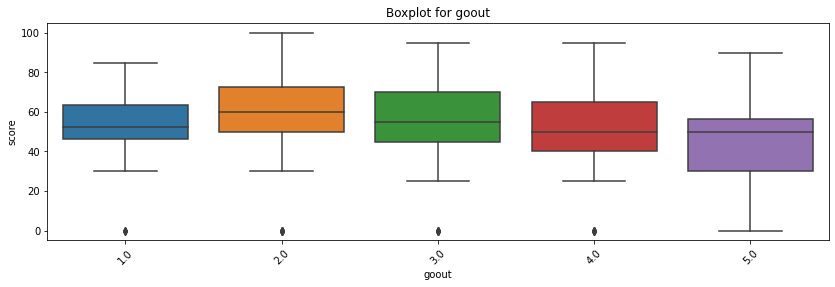

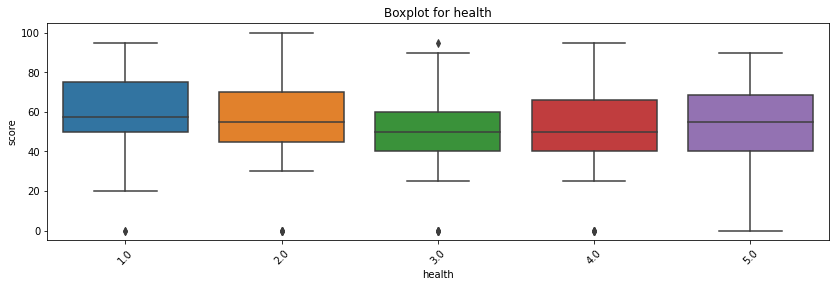

In [58]:
# Передаем в функцию название каждого столбца по отдельности:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
            'health']:
    get_boxplot(col)

По графикам похоже, что все параметры не влияют на итоговую оценку госэкзамена. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок учеников по различным параметрам неразличимы:

In [80]:
''' Функция принимает на вход наименование столбца и если в столбце присутствует статическая разница 
возвращает сообщение о наличии таковой'''

def get_stat_dif(column):
    cols = math_progress[column].value_counts()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math_progress.loc[math_progress.loc[:, column] == comb[0], 'score'], 
                math_progress.loc[math_progress.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [81]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
            'health']:
    get_stat_dif(col)

Как мы видим, параметры номинативных переменных значительно не отличаются, поэтому руководствуясь здравым смыслом оставим в нашем датасете только переменные определяющие название школы (school) и пол ученика (sex). 

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: age, absences, score.

In [83]:
math_progress_for_model = math_progress.filter(items = ['school', 'sex', 'age', 'absences', 'score'])
math_progress_for_model.head()

,school,sex,age,absences,score
0,GP,F,18,6.0,30.0
1,GP,F,17,4.0,30.0
2,GP,F,15,10.0,50.0
3,GP,F,15,2.0,75.0
4,GP,F,16,4.0,50.0
